# 🗓️ Semana 1: Construcción de un Modelo de Regresión Lineal Múltiple 🏠📊

## 📅 Fecha: Octubre 2024

### 🎯 Objetivo del Notebook:
En este notebook, construiremos un **modelo de regresión lineal múltiple** utilizando el conjunto de datos de viviendas (**House Dataset**). Exploraremos cómo diferentes variables (como el número de habitaciones, superficie, etc.) pueden influir en el precio de una vivienda, aplicando técnicas de **análisis predictivo**.


# La Regresión Lineal Múltiple

La regresión lineal es una técnica estadística utilizada para predecir el valor de una variable dependiente (resultado que queremos predecir) en función de una o más variables independientes (factores que creemos que influyen en el resultado). En la regresión lineal múltiple, el modelo se extiende para incluir varias variables independientes, lo que nos permite analizar cómo cada una de estas variables contribuye al valor final de la variable dependiente.

La fórmula general de la regresión lineal múltiple es:


$$\hat Y=\underbrace{\hat \beta_0+\hat \beta_1X+\hat \beta_2X+...\hat \beta_nX}_{modelo}+\underbrace{\epsilon}_{error} $$

La regresión lineal múltiple nos permite estimar la relación entre una variable dependiente "Y" y múltiples variables independientes. En este modelo, el valor de "Y" se calcula utilizando los Mínimos Cuadrados Ordinarios (MCO), que es una técnica que busca minimizar la diferencia entre los valores observados y los estimados.

En este contexto, nuestro modelo tiene múltiples variables independientes que influyen en "Y". Al incluir más de una variable, podemos evaluar cómo cada una de ellas contribuye al valor final, considerando simultáneamente el efecto de todas las demás. Esto nos permite un análisis más preciso, ya que podemos medir el impacto de cada variable mientras mantenemos constantes otras influencias.

El modelo incluye un término de error, el cual representa factores no explicados por nuestras variables independientes. Estos errores se espera que sean menores en comparación con otros enfoques más simples, debido a la inclusión de más variables explicativas que permiten ajustar mejor el modelo a la realidad.



    

_Nota 1: La estimación de los parámetros en la regresión lineal múltiple mediante el método de mínimos cuadrados sigue el mismo principio que en la regresión lineal simple, pero ahora se aplica en un espacio de "p" dimensiones. En lugar de buscar la mejor línea que se ajuste a los puntos, se trata de encontrar el plano p-dimensional que mejor se ajusta a los datos. Para lograrlo, el método de Mínimos Cuadrados Ordinarios (MCO) se utiliza para minimizar la suma de los cuadrados de las desviaciones de los puntos respecto al plano estimado, asegurando así el mejor ajuste posible en el espacio multidimensional._

![image-2.png](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/Regresi%C3%B3n%20m%C3%BAltiple%20aplicada/regression_plane.png)

_Fuente: Stackoverflow:scatterplot3d regression plane with residuals_

Para la interpretación de los coeficientes de nuestros estimadores, tenemos que tener en cuenta que se trata de una estimación ajustada de los coeficientes, lo que significa que es: "después de tener en cuenta los efectos lineales de las otras variables independientes sobre la variable dependiente, pero también sobre la variable predictora", lo que se traduce a que β1 corresponde a la pendiente de la relación entre "Y" y "X1"  cuando los efectos lineales de las otras variables explicativas (X2, … , Xn), han sido eliminados, tanto a nivel de la variable dependiente "Y"  como también a nivel de X1 .

### Prueba de hipótesis de los coeficientes de la Regresión Lineal Múltiple


La regresión simple como la múltiple trabaja bajo el supuesto que los coeficientes son significativos. Para determinar si lo son, la regresión tanto simple como múltiple trabaja con un contraste de hipótesis donde se evalúa si  el modelo es o no explicativo. Para ello buscamos que la pendiente de los estimadores sea diferente de cero, dado que si fuera nula, no existiría una línea de regresión y por lo tanto no habría la relación entre la variable independiente y la dependiente.


Para ello, utilizando las pruebas _t_ y sus niveles críticos se busca contrastar que:
- H0 : β1 = β2 = . . . = βn = 0
- H1 : β1 = β2 = . . . = βn ≠ 0




La prueba de los coeficientes ($\beta$) nos permite verificar si existe una relación significativa entre la variable independiente que estamos estudiando y la variable dependiente, manteniendo las demás variables constantes (ceteris paribus). En otras palabras, queremos comprobar si la variable independiente tiene un impacto real sobre la variable dependiente cuando todos los demás factores permanecen sin cambios.

Observando los valores críticos de la prueba _t_, se puede determinar si los betas son estadísticamente significativos y por lo tanto si contribuyen significativamente a explicar lo que ocurre en la variable dependiente "Y", por lo que tenemos evidencia para incluirlas o descartarlas del modelo analizado.

Finalmente, en este script también cubriremos la temática de ajuste del modelo en el que analizaremos los valores de R^2 y R^2 ajustado, el cual controla por el número de variables independientes introducidas en el modelo.

Comencemos!

##🔍 Enfoques para el Desarrollo del Modelo: Econométrico y Ciencia de Datos

En este notebook, vamos a analizar el **modelo de regresión lineal múltiple** desde dos perspectivas complementarias: el **enfoque econométrico** y el **enfoque de ciencia de datos**.

- Desde el **enfoque econométrico**, nos centraremos en comprender la relación entre las variables, la validez de los supuestos, y la interpretación detallada de los coeficientes.
- Desde el **enfoque de ciencia de datos**, nos enfocaremos en la predicción y el rendimiento del modelo, explorando cómo ajustar y evaluar el modelo de la mejor manera posible.

## Enfoque econométrico y ciencia de datos.
Una de las principales diferencias entre el enfoque de econometría y la Ciencia de Datos por Machine Learning, es que por el enfoque de ML nos centramos en la analítica predictiva más que en las relaciones entre variables. Por ello, a lo largo de este script no centraremos nuestros esfuerzos en interpretar coeficientes, o encontar relaciones entre variables, sino entrenar de manera óptima a nuestros algoritmos para que alcancen niveles predictivos altos.

Como regla general, los algoritmos de ML son más flexibles que el marco econométrico, ya que nos enfocamos en predecir, por ello muchos de los supuestos que cubrimos en la primera semana no aplican a este enfoque a excepción de que si vamos a aplicar una Regresión Lineal, requerimos haya linealidad en los parámetros ya que scikit learn, que es el module en Python para modelar por ML, ajusta una línea recta a los datos de entrenamiento.

$$\hat Y=\underbrace{\hat \beta_0+\hat \beta_1X+\hat \beta_2X+...\hat \beta_nX}_{modelo}+\underbrace{\epsilon}_{error} $$

Dentro del enfoque de Machine Learning necesitaremos entender tres conceptos fundamentales:

Es una técnica que permite la división de nuestra base de datos en dos categorías:

### Split train/test

- La de de entrenamiento llamada "train", que se utiliza para que el algoritmo "aprenda" de las relaciones entre las variables y los datos, por lo que el conjunto de datos de entrenamiento es generalmente de mayor tamaño en comparación con el conjunto de datos de prueba.

- La de de prueba llamada "test", que se utiliza para estimar el rendimiento de los algoritmos de aprendizaje automático  basados en predicciones.  De manera general, el conjunto de prueba se divide en el 30 % de los datos reales y constituye un conjunto de datos que el algoritmo nunca antes ha visto. De esta forma se garantiza que en un ambiente de producción, el modelo desarrollado opere de manera similar a los resultados obtenidos en el "test" set.

### Métricas de evaluación de la Regresión Lineal

En lo que respecta a la evaluación de nuestro modelo, en el presente script ya no obtedremos el output donde evaluábamos los coeficientes y su significancia, si no que dependiendo del problema nos centraremos en métricas que cuantifiquen el poder explicativo de nuestro modelo. Así, si el problema es de regresión, las tres medidas más comunes utilizadas para evaluar las predicciones son:
- El Error cuadrático medio (MSE)
- El Error cuadrático medio (RMSE)
- El Error absoluto medio (MAE)

Las cuales de una u otra forma miden cuan lejos están los valores predichos de los valores observados en nuestro "test set"

#### 1.MSE

El error cuadrático medio, o MSE  es una métrica de error, así como una función de costos importante para algoritmos ajustados. Aquí, "mínimos cuadrados" se refiere a minimizar el error cuadrático medio entre las predicciones y los valores esperados.

El MSE se calcula como la media o el promedio de las diferencias al cuadrado entre los valores objetivo predichos y esperados en un conjunto de datos y matemáticamente se expresa como:

$${MSE}=\frac{1}{n} \sum_{i=1}^n \left(Y_i-\hat{Y_i}\right)^2$$

Donde:
- 𝑌𝑖 es el i-ésimo valor esperado en el conjunto de datos
- 𝑌𝑖 estimado, es el i-ésimo valor predicho

La diferencia entre estos dos valores se eleva al cuadrado, lo que tiene dos efectos:
- El efecto de eliminar el signo, lo que da como resultado un valor de error positivo, y
- El efecto de inflar o magnificar errores grandes. Es decir, cuanto mayor sea la diferencia entre los valores pronosticados y esperados, mayor será el error cuadrático positivo resultante, por lo que se penaliza más a los modelos por errores más grandes cuando MSE se usa como una función de costo.

#### 2.RMSE

El RMSE, es una extensión del error cuadrático medio que calcula la raíz cuadrada del error, lo que significa que las unidades del RMSE son las mismas que las unidades originales del valor objetivo que se predice, por ello si la variable objetivo tiene dólares como unidades, el RMSE también tendrá la misma undiad y no "dólares al cuadrado" como el MSE.

El RMSE se define de la siguiente manera:

$$RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^n \left(Y_i-\hat{Y_i}\right)^2}$$

#### 3.MAE

El error absoluto medio, o MAE, es una métrica en que las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice, a diferencia del RMSE los cambios en MAE son lineales. Por otra parte, y a diferencia de las métricas previas, el MAE no da más o menos peso a los diferentes tipos de errores, en cambio las puntuaciones del MAE aumentan linealmente con los incrementos en el error.

Como su nombre indica, la puntuación MAE se calcula como la media de los valores de error absolutos, por lo tanto, la diferencia entre un valor esperado y predicho puede ser positiva o negativa y se fuerza a ser positiva al calcular el MAE.

$$ MAE = \frac{1}{n} *{\sum_{i=1}^n} \left|Y_i-\hat{Y_i}\right|$$



     


# 🏡 Caso de Estudio: Predicción del Precio de Casas en una Ciudad

## Contexto del problema:

Supongamos que estamos trabajando como analistas para una **empresa inmobiliaria** que busca ayudar a **compradores y vendedores** a entender mejor el mercado de bienes raíces. Queremos construir un **modelo de regresión lineal múltiple** para predecir el **precio de venta de las casas** en una ciudad, basándonos en características específicas de cada vivienda.


Para lo cual seguiremos los siguientes pasos:

### 🔄 1.  Preparación de Datos
Primero, cargaremos y exploraremos el conjunto de datos, asegurándonos de que no haya **valores faltantes** y estandarizando las variables.

### 🛠️ 2. Construcción del Modelo
Utilizaremos la **regresión lineal múltiple** para entender cómo las características de la casa (número de habitaciones, baños, superficie, etc.) influyen en su precio.

### 📈 3. Interpretación de los Coeficientes
- Un **coeficiente positivo** indica que el aumento de esa característica hace que el precio de la casa aumente.
- Un **coeficiente negativo** sugiere que el aumento de esa característica reduce el precio de la casa.

### 📝 Conclusión
Este modelo permite entender cómo los diferentes **factores impactan el precio de una casa**, proporcionando información valiosa tanto para **compradores** como para **vendedores**, lo cual mejora la eficiencia del mercado inmobiliario y ayuda a definir **estrategias adecuadas de compra-venta**.



## 🖥️ Desarrollo del Modelo de Regresión Lineal Múltiple con House Dataset 💻


## 1. Enfoque econométrico

Comenzaremos con el **enfoque econométrico**, donde aplicaremos los conceptos teóricos que sustentan la regresión lineal múltiple y realizaremos pruebas estadísticas para validar nuestro modelo.


### Importar los moódulos requeridos

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula y al módulo para las pruebas de hipótesis.

In [239]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

Ahora, llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [240]:
# prompt: conectar a drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [241]:
df = pd.read_csv("/content/drive/MyDrive/UDLA-Analitica predictiva/UDLA_Analitica_predictiva-main/1.2Regresión Linear simple aplicada/house_dataset.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### Recodificar el nombre de las columnas a español

In [242]:
df.rename({'price':'precio', 'bedrooms': 'cuartos', 'bathrooms':'banios', 'stories': 'pisos', 'mainroad':'carretera',
          'guestroom':'cuarto_huespedes', 'basement': 'sotano', 'hotwaterheating':'calefaccion', 'airconditioning':'AC',
           'parking':'parqueadero', 'prefarea':'periferia', 'furnishingstatus':'amoblado' }, axis=1, inplace=True)

### Análisis de valores extremos


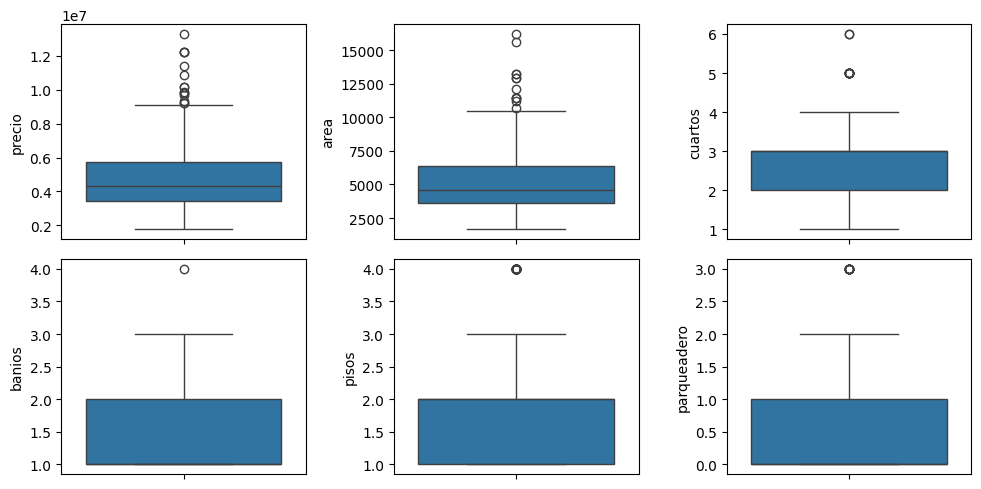

In [243]:
# Box plots
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['precio'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['cuartos'], ax = axs[0,2])
plt1 = sns.boxplot(df['banios'], ax = axs[1,0])
plt2 = sns.boxplot(df['pisos'], ax = axs[1,1])
plt3 = sns.boxplot(df['parqueadero'], ax = axs[1,2])

plt.tight_layout()

De la gráfica de boxplot, podemos ver que las variables donde se requiere el tratamiento de valores extremos es en el precio, y en el área.

Para el número de baños, el número de cuartos, el número de pisos y el número de parqueaderos no se tiene suficientes datos extremos y su distancia de la media no es tan extrema como en el de las dos variables anteriores.

In [244]:
df.describe()

,precio,area,cuartos,banios,pisos,parqueadero
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### 1. Variable dependiente "Y": precio


In [245]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.precio.quantile(0.25)
Q3 = df.precio.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

2310000.0


In [246]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['precio'] < (Q1 - 1.5 * IQR)) |(df['precio'] > (Q3 + 1.5 * IQR)))]
df.shape

(530, 13)

<Axes: xlabel='precio', ylabel='Density'>

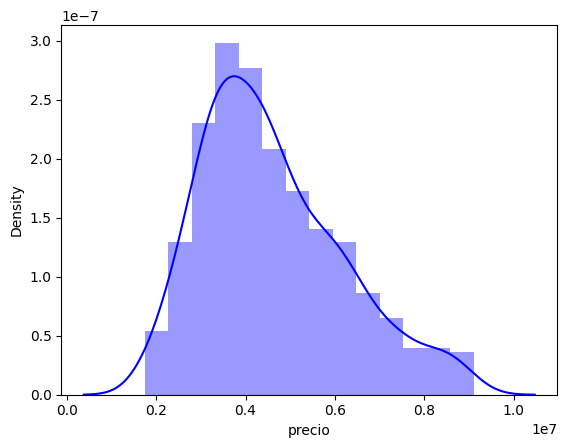

In [247]:
sns.distplot(df['precio'],color="blue")

#### 2. Variable dependiente X1: área


In [248]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_area = df.area.quantile(0.25)
Q3_area = df.area.quantile(0.75)
IQR_area = Q3_area - Q1_area  #rango intercuartil
print(IQR_area)

2768.25


In [249]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['area'] < (Q1_area - 1.5 * IQR_area)) |(df['area'] > (Q3_area + 1.5 * IQR_area)))]
df.shape

(517, 13)

<Axes: xlabel='area', ylabel='Density'>

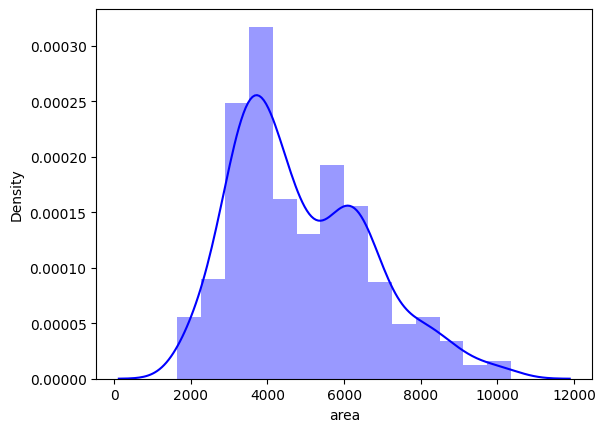

In [250]:
sns.distplot(df['area'],color="blue")

Listo, recordemos las correlaciones de las variables dado que vamos a introducir nuevas variables independiente:

#### Correlaciones entre las variables

In [251]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

,precio,area,cuartos,banios,pisos,parqueadero
precio,1.000000,0.533186,0.335328,0.466483,0.446839,0.321058
area,0.533186,1.000000,0.127745,0.171528,0.109877,0.357276
cuartos,0.335328,0.127745,1.000000,0.346230,0.406684,0.105561
banios,0.466483,0.171528,0.346230,1.000000,0.311314,0.127102
pisos,0.446839,0.109877,0.406684,0.311314,1.000000,0.022043
parqueadero,0.321058,0.357276,0.105561,0.127102,0.022043,1.000000


In [252]:
numerical_df.corr().style.background_gradient(cmap='coolwarm')

,precio,area,cuartos,banios,pisos,parqueadero
precio,1.000000,0.533186,0.335328,0.466483,0.446839,0.321058
area,0.533186,1.000000,0.127745,0.171528,0.109877,0.357276
cuartos,0.335328,0.127745,1.000000,0.346230,0.406684,0.105561
banios,0.466483,0.171528,0.346230,1.000000,0.311314,0.127102
pisos,0.446839,0.109877,0.406684,0.311314,1.000000,0.022043
parqueadero,0.321058,0.357276,0.105561,0.127102,0.022043,1.000000


Ahora comparemos esta información con la gráfica de las variables cuantitativas:

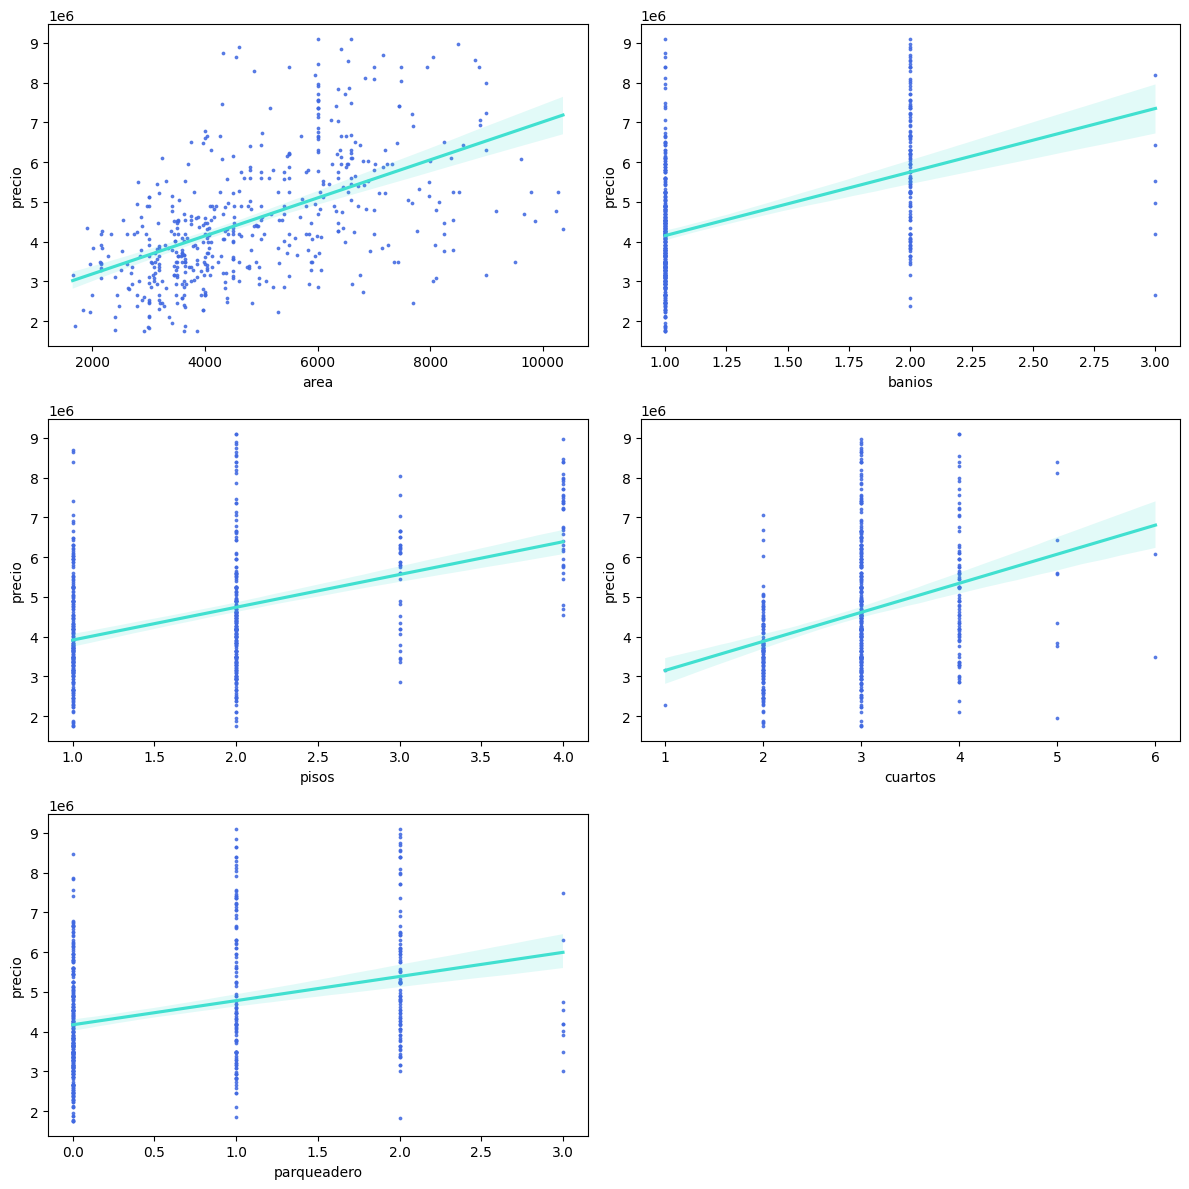

In [253]:
# Número de las variables
n = 6
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = numerical_df.corr()
#
cols = corr.nlargest(6, "precio")["precio"].index
# Calculate correlation
for i in np.arange(1,6):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['precio'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

### 🧮 Construcción del modelo

En los **modelos de regresión lineal**, a veces es conveniente aplicar una **transformación logarítmica** a la **variable dependiente (Y)**. Esto puede ser necesario por las siguientes razones:

#### 1. 📈 Distribución Asimétrica (Sesgo)
Si la variable dependiente tiene una **distribución asimétrica** (sesgo positivo o negativo), el modelo de regresión puede ser menos preciso. Esto suele ocurrir cuando hay **valores extremos** o cuando los datos tienen una **cola larga**, como los ingresos, precios de viviendas o ventas, que pueden tener una gran variabilidad. Al aplicar el logaritmo, se reduce la **asimetría**, haciendo que la distribución de "Y" sea más **simétrica** y facilitando un mejor ajuste del modelo.

#### 2. 🔄 Relación No Lineal con las Variables Independientes
Si existe una **relación no lineal** entre la variable dependiente y las variables independientes, aplicar el logaritmo a "Y" puede hacer que la relación sea más **lineal**. Esto ayuda al modelo a capturar mejor la tendencia, especialmente cuando los incrementos en la variable independiente producen un **crecimiento porcentual** en la variable dependiente.

#### 3. 📊 Interpretación de los Coeficientes
Cuando se transforma la variable dependiente utilizando el logaritmo, la interpretación de los coeficientes cambia. Específicamente, los coeficientes se interpretan como un **cambio porcentual en "Y"** por cada **unidad adicional en "X"**. Esto es útil en situaciones donde es más intuitivo pensar en cambios relativos o proporcionales, como en el caso del **crecimiento económico** o de **precios**.

#### 4. ⚠️ Reducir el Efecto de Valores Atípicos
Transformar la variable dependiente con un logaritmo también puede ayudar a **reducir el impacto de los valores atípicos**. Dado que los valores extremos se "comprimen" al aplicar el logaritmo, el modelo se hace menos sensible a estos valores atípicos, mejorando la estabilidad de la regresión.

#### 🚫 Cuándo No Utilizar el Logaritmo
- Si la variable dependiente tiene **valores cero o negativos**, no se puede aplicar el logaritmo directamente, ya que matemáticamente no está definido.
- Si la relación entre las variables ya es aproximadamente **lineal**, la transformación logarítmica podría ser innecesaria y complicar la interpretación sin mejorar el ajuste del modelo.

#### Resumen
Se debe aplicar la transformación logarítmica a la variable dependiente cuando se quiere mejorar la **simetría**, hacer la relación más **lineal**, **reducir el efecto de valores extremos**, o **interpretar los resultados** en términos de cambios porcentuales. Esto mejora la calidad y la estabilidad del modelo de regresión.


In [254]:
log_precio=np.log(df.precio)
df['log_precio']=log_precio

Perfecto, como vamos a manera de ejercicio, incluir todas las variables para evaluar si son significativas o no, lo que vamos a realizar a continuación es recodificar las variables cualitativas de forma numérica para que el modelo de regresión pueda cuantificar su incidencia en la variable dependiente de mejor manera.
Para ello, vamos a seguir un proceso para dumificar las variables categóricas con la ayuda del module de pandas.

In [255]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

Una vez que hemos separado a las variables cualitativas podemos operar de tres maneras:
- La primera implica codificar como 0 y 1s a las variables que tengan dos niveles
- La segunda se puede llevar a cabo aplicando la función de pandas pd.get_dummies() que crea una columna por cada nivel
- La tercera es usando OneHotEncoder

Para evitar crear más columnas de las necesarias, vamos a dumificar sólo aquellas que tengan más de dos niveles.

In [256]:
df[var_cualitativas]

,carretera,cuarto_huespedes,sotano,calefaccion,AC,periferia,amoblado
15,yes,no,yes,no,no,no,semi-furnished
16,yes,yes,yes,no,yes,yes,unfurnished
17,yes,no,no,no,yes,no,furnished
18,yes,yes,no,no,yes,no,furnished
19,yes,no,no,no,yes,yes,semi-furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [257]:
df.loc[:,var_cualitativas]=df[var_cualitativas].replace(to_replace = ['yes','no'],value = ['1','0'])

In [258]:
df

,precio,area,cuartos,banios,pisos,carretera,cuarto_huespedes,sotano,calefaccion,AC,parqueadero,periferia,amoblado,log_precio
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,16.023785
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,16.023785
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,16.008281
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,16.000438
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,15.996493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,14.414347
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,14.384879
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,14.375126
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,14.375126


Perfecto, ahora nos queda dumificar la variable amoblado utilizando labelEncoder:

In [259]:
from sklearn.preprocessing import LabelEncoder

In [260]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [261]:
df.amoblado = labelencoder.fit_transform(df.amoblado)
df

,precio,area,cuartos,banios,pisos,carretera,cuarto_huespedes,sotano,calefaccion,AC,parqueadero,periferia,amoblado,log_precio
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,16.023785
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2,16.023785
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,16.008281
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,16.000438
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,15.996493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2,14.414347
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,14.384879
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2,14.375126
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,14.375126


Y listo!, pueden utilizar cualquiera de los tres métodos para lograr el objetivo.

Una vez que tenemos nuestra base de datos en el estado deseado para la modelación, procedemos por fines explicativos a incluir todas las variables. En la práctica se debería incluir aquellas que tengan mayor asociación lineal.

In [262]:
df.head(2)

,precio,area,cuartos,banios,pisos,carretera,cuarto_huespedes,sotano,calefaccion,AC,parqueadero,periferia,amoblado,log_precio
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,16.023785
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2,16.023785


In [263]:
df[var_cualitativas].astype("category")

,carretera,cuarto_huespedes,sotano,calefaccion,AC,periferia,amoblado
15,1,0,1,0,0,0,1
16,1,1,1,0,1,1,2
17,1,0,0,0,1,0,0
18,1,1,0,0,1,0,0
19,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,2
541,0,0,0,0,0,0,1
542,1,0,0,0,0,0,2
543,0,0,0,0,0,0,0


In [264]:
regresion = ols("log_precio ~ area + cuartos + banios + pisos + carretera + cuarto_huespedes + sotano + calefaccion +\
                AC + parqueadero + periferia + amoblado", data=df)
results = regresion.fit()

In [265]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     80.06
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          1.92e-108
Time:                        22:05:51   Log-Likelihood:                 90.366
No. Observations:                 517   AIC:                            -154.7
Df Residuals:                     504   BIC:                            -99.51
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                14.39

Baños
Por cada unidad de baño el precio aumenta  0.14 ctvs

Parqueadero: -0.0376

Por cada parqueadero el precio disminuye en 0.03



A priori que diferencia, verdad?

Lo primero que debemos hacer antes de celebrar por el R^2, es analizar el R^2 ajustado, dado que este penaliza la variabilidad explicada por el número de variables.
En esta línea sabemos que este modelo alcanza a explicar en un 65% la variabilidad de nuestra variable dependiente por medio de la inclusión de 12 variables!

El siguiente paso es analizar cúales de las variables son estadísticamente significativas mediante el contraste de hipótesis

- H0 : β1 = β2 = . . . = βn = 0
- H1 : β1 = β2 = . . . = βn ≠ 0



Como todas las variables icluídas pasan la prueba al 95% de confianza el siguiente paso es la validación de los supuestos de Regresión Lineal. En este caso ya no sólo verificaremos los tres cubiertos en el script anterior, sino también multicolinearidad mediante el VIF.

### Verificación de los supuestos de la Regresión Lineal

Dado que contamos con una sola variable explicativa en este modelo de Regresión Lineal, los supuestos a verificar se centrarán en:

- Multicolinearidad perfecta y multicolinearidad no perfecta

- Linealidad en los parámetros
    
- Normalidad en los residuos
    
- Homocedasticidad en los residuos

#### 1. Multicolinearidad

Para el primer supuesto y dado que contamos con 12 variables, vamos a importar de la librería statsmodel el VIF:

In [266]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [267]:
df2=df[df.columns.difference(['precio', 'log_precio'])]
df2

,AC,amoblado,area,banios,calefaccion,carretera,cuarto_huespedes,cuartos,parqueadero,periferia,pisos,sotano
15,0,1,6000,1,0,1,0,4,2,0,2,1
16,1,2,6600,2,0,1,1,4,1,1,2,1
17,1,0,8500,2,0,1,0,3,2,0,4,0
18,1,0,4600,2,0,1,1,3,2,0,2,0
19,1,1,6420,2,0,1,0,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,0,2,3000,1,0,1,0,2,2,0,1,1
541,0,1,2400,1,0,0,0,3,0,0,1,0
542,0,2,3620,1,0,1,0,2,0,0,1,0
543,0,0,2910,1,0,0,0,3,0,0,1,0


In [268]:
df2.dtypes

,0
AC,object
amoblado,int64
area,int64
banios,int64
calefaccion,object
carretera,object
cuarto_huespedes,object
cuartos,int64
parqueadero,int64
periferia,object


Como podemos ver, hay algunos tipos de datos que siguen como variables categóricas por lo que vamos a tener que coercionarlos a numéricos, caso contrario el VIF no funcionará:

In [269]:
df2=df2.apply(pd.to_numeric)

In [270]:
df2.dtypes

,0
AC,int64
amoblado,int64
area,int64
banios,int64
calefaccion,int64
carretera,int64
cuarto_huespedes,int64
cuartos,int64
parqueadero,int64
periferia,int64


Ahora si, calculemos el VIF de nuestras vaibales para ver que tan correlacionadas están entre sí:

In [271]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns

# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)


             feature        VIF
0                 AC   1.734858
1           amoblado   2.732948
2               area  10.680511
3             banios   9.928675
4        calefaccion   1.074393
5          carretera   6.782547
6   cuarto_huespedes   1.514215
7            cuartos  16.425891
8        parqueadero   1.895498
9          periferia   1.441689
10             pisos   7.800318
11            sotano   2.001389


Recordemos los rangos del VIF:

- Si el VIF es 1, no existe entre las variables analizadas

- Si el VIF es >1 y <5, la correlación es moderada entre entre las variables analizadas, pero no constituye a menudo una transgresión grave para requerir atención

- Si el VIF es >5, la correlación es potencialmente severa entre entre entre las variables analizadasuna por lo que las estimaciones de los coeficientes y los valores p en el resultado de la regresión probablemente no sean confiables

Por lo tanto, tenemos 5 variables que potencialmente serían un problema.
La forma de corregir al VIF es eliminar una por una las variables que muestran multicolinearidad hasta permanecer en los rangos aceptados (comenzando desde el mayor VIF)

Aplicamos nuevamente el VIF habiendo removido la variable de cuartos.

In [272]:
regresion_2 = ols("log_precio ~  banios + pisos + carretera + cuarto_huespedes + sotano + calefaccion +\
                AC + parqueadero + periferia + amoblado", data=df2)
results_2 = regresion_2.fit()

In [273]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     74.27
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           1.26e-92
Time:                        22:05:51   Log-Likelihood:                 48.084
No. Observations:                 517   AIC:                            -74.17
Df Residuals:                     506   BIC:                            -27.44
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.6197      0.045  

In [274]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['cuartos'])

# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['cuartos'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['cuartos'])].columns))]

print(vif_data)


             feature       VIF
0                 AC  1.727920
1           amoblado  2.569279
2               area  9.843391
3             banios  8.361942
4        calefaccion  1.073286
5          carretera  6.714683
6   cuarto_huespedes  1.504878
7        parqueadero  1.894673
8          periferia  1.441597
9              pisos  6.309331
10            sotano  1.902233


Continuemos con el area

In [275]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['area', 'cuartos'])

# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['area','cuartos'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['area','cuartos'])].columns))]

print(vif_data)


            feature       VIF
0                AC  1.688295
1          amoblado  2.456704
2            banios  7.532418
3       calefaccion  1.073282
4         carretera  5.499845
5  cuarto_huespedes  1.478450
6       parqueadero  1.731921
7         periferia  1.417811
8             pisos  6.247214
9            sotano  1.901920


Y eliminemos en esta ronda los baños:

In [276]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['area', 'cuartos', 'banios'])

# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['area','cuartos','banios'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['area','cuartos', 'banios'])].columns))]

print(vif_data)


            feature       VIF
0                AC  1.683958
1          amoblado  2.326249
2       calefaccion  1.069104
3         carretera  5.129900
4  cuarto_huespedes  1.471885
5       parqueadero  1.688140
6         periferia  1.415787
7             pisos  4.500335
8            sotano  1.773974


Listo, llamemos a nuestra regresión para ver con qué modelo nos quedamos y cuál es su grado de ajuste:

In [277]:
regresion_3 = ols("log_precio ~ pisos + carretera + cuarto_huespedes + sotano + calefaccion +\
                AC + parqueadero + periferia + amoblado", data=df2)
results_3 = regresion_3.fit()

In [278]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:             log_precio   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     68.47
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           7.55e-82
Time:                        22:05:51   Log-Likelihood:                 20.212
No. Observations:                 517   AIC:                            -20.42
Df Residuals:                     507   BIC:                             22.06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.7868      0.041  

In [279]:
#Por cada 1 piso más alto que esté el departamento el precio del departamento va a aumentar en 0.12 ctvs
#Si estar cerca

precio estimado=14.78 + 0.12(4)+0.14(1)-0.06(1)

Bueno, hemos pasado de explicar en un 65% la variabilidad de nuestra variable dependiente por medio de la inclusión de 12 variables a explicar 54%, luego de la eliminación de la especificación de 3 variables que se encontraban correlacionadas.

Continuemos con los siguientes supuestos para ver cómo nos va en nuestro análisis:

#### 2. Linealidad en los parámetros

Para esta prueba, podemos repetir de par en par la relación que existe entre el log_precio del inmueble y c/variable independiente: pisos, carretera, cuarto_huespedes, sotano, calefaccion, AC, parqueadero, periferia, amoblado. Dado que algunas de las variables fueron dumificadas, la prueba gráfica será de poca ayuda, por lo que es conveniente evaluar los siguientes supuestos para ver si existe algún problema en nuestro modelo.

#### 3. Normalidad en los residuos

Para la normalidad en los residuos del modelo, compararemos mediantelos gráficos QQ (o gráfico de cuantiles-cuantiles)si los puntos del gráfico forman aproximadamente una línea diagonal recta.

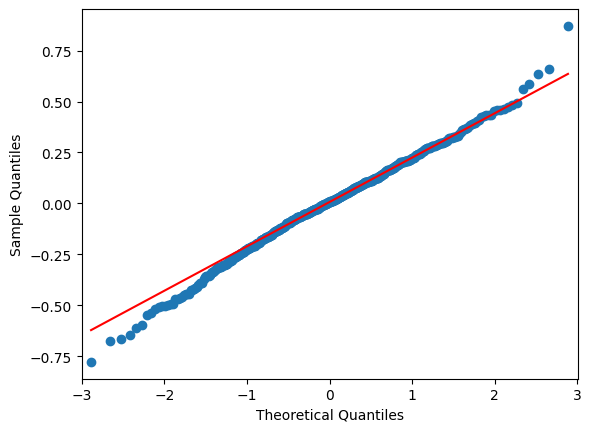

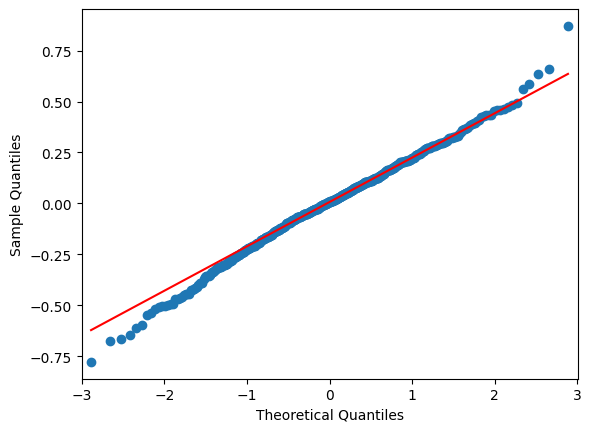

In [280]:
sm.qqplot(results_3.resid, line='q')

Como podemos ver, las líneas azules que representan a los residuos caen cerca de la línea recta. Podemos observar en el gráfico de igual manera que existen observaciones que caen muy por fuera de la línea, por lo que un anális con la prueba de Jarque-Bera para validar la hipótesis de normalidad en residuos podría ser útil.

Para aplicar una prueba estadística como la de Jarque Bera, es conveniente importar un submódulo de statsmodels que son las estadisticas "stats"

In [281]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

Recordemos que el test Jarque-Bera es una prueba de bondad de ajuste que determina si los datos de la muestra tienen asimetría y curtosis que coinciden con una distribución normal.

Como norma general, el estadístico de prueba de la prueba de Jarque-Bera es siempre un número positivo y cuanto más alejado de cero esté, habrá más evidencia de que los datos de la muestra no siguen una distribución normal.

La hipótesis nula de este test es:

- H0: Los datos se distribuyen normalmente
- H1: Los datos no se distribuyen normalmente

In [282]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_3.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 6.2513322685227415),
 ('Chi^2 two-tail prob.', 0.043907675472591536),
 ('Skew', -0.15619399962100838),
 ('Kurtosis', 3.4388746752421735)]

Dado que este valor de probabilidad es menor que .05, podemos rechazar la hipótesis nula al 95% de confianza, por lo que tenemos suficiente evidencia para decir que estos datos tienen asimetría y curtosis que es significativamente diferente de una distribución normal. Sin embargo al 90% de confianza, no se logra rechazar la hipótesis nula, por lo que podríamos relajar un poco este supuesto.

Finalmemte, podemos contrastar si la media de los residuos de este modelo es 0, o muy cercano a este. Para esto podemos extraer los residuos del modelo y calcular la media directamente:

In [283]:
results_3.resid.mean()

2.3748894533722497e-14

La media de los residuos tiende a cero y es muy pequeña por lo que no se estaría violando este supuesto.

#### 4. Homocedasticidad en los residuos

Para comprobar este supuesto podemos graficar los valores ajustados frente a una gráfica de residuos. De existir heterocedasticidad, los residuos se dispersarán mucho más a medida que los valores ajustados aumenten creando una imagen de cono.

Aplicando a Python este gráfico se obtendría por medio del comando residplot dentro de seaborn.

In [284]:
y_pred=results_3.predict()

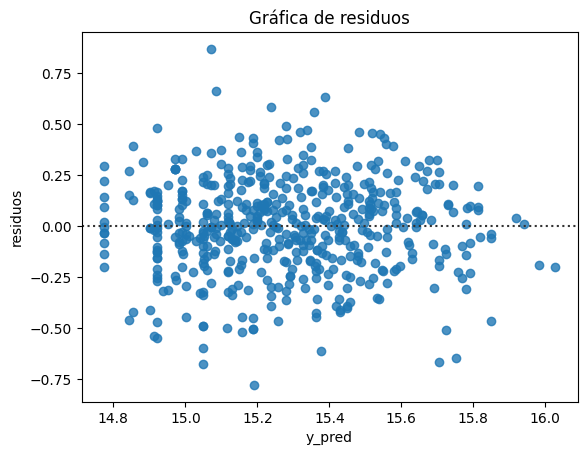

In [285]:
sns.residplot(x=y_pred, y=results_3.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")
plt.show()

De la gráfica de residuos anterior, podríamos inferir que los residuos no formaron ningún patrón. Por lo tanto, los residuos son independientes entre sí.

Y además, los residuos tienen varianza constante. La varianza no parece aumentar/disminuir constantemente con el valor y_pred.

Para aplicar una prueba estadística como la de Breush Pagan, es conveniente importar un submódulo de statsmodels que son las estadisticas "stats"

Recordemos que este test se utiliza para determinar la heterocedasticidad en un modelo de regresión lineal, ya que analiza si la varianza estimada de los residuos de una regresión dependen de los valores de las variables independientes.


La hipótesis nula de este test es:

- H0: Existe homocedasticidad
- H1: La homocedasticidad no está presente , por lo que existe heterocedasticidad

In [286]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results_3.resid, results.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 21.917618686817917),
 ('p-value', 0.03845355073847154),
 ('f-value', 1.8593672883382872),
 ('f p-value', 0.03698602720778112)]

En este ejemplo, como el estadístico del multiplicador de Lagrange para la prueba es de 21 y el valor p correspondiente es 0.03, el cual es menor a 0.05, podemos rechazar la hipótesis nula, y concluímos que no tenemos evidencia suficiente para decir que la heterocedasticidad no está presente en el modelo de regresión.
Sin embargo este supuesto tampoco pasaría al 90% de confianza, por lo que se podrían explorar opciones más avanzadas como la Regresión robusta de Hubert-White.

En este escenario, tenemos algunas opciones, podriamos trabajar en feature engineering que es la creación de nuevas variables a partir de las que tenemos para mejorar nuestra calidad del modelo, o trabajar con modelos robustos diseñados específicamente para modelos con problemas de heterocedasticidad.

Así, podemos decir que del tercer modelo obtenido, hemos alcanzado a capturar el 54% de la variabilidad del logaritmo del precio mediante las variables independientes de número de pisos ,parqueaderos, y las variables dicotómicas que abarcan el concepto de si el inmueble cuenta con: cuarto_huespedes, sotano,  calefaccion, AC, carretera, periferia y cuál es su nivel de amoblado.

Para ejemplificar cómo sería la interpretación, tomemos como ejemplo una variable numérica y una dicotómica:
- En nuestro modelo Log-Nivel interpretaríamos la variable "pisos" como: Un incremento de 1 piso en el inmueble, se asocia a un cambio en "Y" de (100·β1 )%, ( 12%)
- Por su parte una variable dicotómica como si la vivienda dispone de AC se interpretaría como: Manteniendo todas las variables constantes, la presencia de AC en un inmueble se asocia con un aumento del (100·βx )%, ( 20%) aka. Si el precio de una vivienda sin AC es de 100,000 y se lo compara con otra que sí disponga de este ammenity, se calcula que el precio de la vivienda será de 120,000.

### Para finalizar con el enfoque econométrico:

Para concluir este script vamos a predecir valores por medio de su forma funcional:

$$log price = 14.78 + 0.14  \times  carretera + 0.1a \times cuarto_huespedes+ 0.10 \times sotano + 0.16 \times calefaccion + 0.20 \times AC + 0.13  \times  periferia+ 0.12  \times  pisos+ 0.08  \times  parqueadero - 0.06  \times  amoblado $$


Por lo que para predecir el logaritmo del precio del inmueble requeriríamos los valores de las variables independientes incluídas en la forma funcional en el mismo formato que fueron incluídos en el modelo.

Una forma más automática de realizarlo, es utilizando el método .predict() el cual calculará el valor de "Y" cuando se le entregue los valores de la variables independientes. Así:

In [287]:
df3=df2[df2.columns.difference(['area', 'cuartos', 'banios', 'precio', 'log_precio'])]
# df3['intercepto']=1
df3=df3[[ 'pisos', 'carretera', 'cuarto_huespedes', 'sotano', 'calefaccion', 'AC', 'parqueadero', 'periferia', 'amoblado']]
df3

,pisos,carretera,cuarto_huespedes,sotano,calefaccion,AC,parqueadero,periferia,amoblado
15,2,1,0,1,0,0,2,0,1
16,2,1,1,1,0,1,1,1,2
17,4,1,0,0,0,1,2,0,0
18,2,1,1,0,0,1,2,0,0
19,2,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
540,1,1,0,1,0,0,2,0,2
541,1,0,0,0,0,0,0,0,1
542,1,1,0,0,0,0,0,0,2
543,1,0,0,0,0,0,0,0,0


In [288]:
results_3.predict()

array([15.38837647, 15.69845873, 15.81193904, 15.6774587 , 15.54125028,
       15.55290272, 15.51921281, 15.5772116 , 15.70398555, 15.55839112,
       15.91891114, 15.94039264, 15.07262203, 15.48328992, 15.64900395,
       15.67271345, 15.74232624, 15.61086308, 15.35660444, 15.70398555,
       15.81193904, 15.69400777, 15.81193904, 15.79178102, 15.66109943,
       15.63738994, 15.78318419, 15.67271345, 15.53417073, 15.73071223,
       15.45309866, 15.73071223, 16.02686462, 15.23753686, 15.56007076,
       15.51702989, 15.59148664, 15.84977981, 15.74232624, 15.52661909,
       15.33793872, 15.98347858, 15.78016701, 15.84977981, 15.31846357,
       15.28077755, 15.47716431, 15.81886385, 15.58491798, 15.08423605,
       15.35039035, 15.56777714, 15.51025982, 15.64395859, 15.68278234,
       15.54128871, 15.28269543, 15.65641023, 15.65641023, 15.79213718,
       15.64177903, 15.49762101, 15.51530518, 15.57987262, 15.44514905,
       15.52271146, 15.41678278, 15.26160251, 15.65291158, 15.35

In [289]:
y_pred=results_3.predict(df3)
y_pred

,0
15,15.388376
16,15.698459
17,15.811939
18,15.677459
19,15.541250
...,...
540,15.191990
541,14.843934
542,14.921782
543,14.913547


#### Comparemos las predicciones a los valores reales de Y

In [290]:
df.log_precio

,log_precio
15,16.023785
16,16.023785
17,16.008281
18,16.000438
19,15.996493
...,...
540,14.414347
541,14.384879
542,14.375126
543,14.375126


También podríamos darle al modelo un vector para que prediga un sólo valor:


[ 'pisos', 'carretera', 'cuarto_huespedes', 'sotano', 'calefaccion', 'AC', 'parqueadero', 'periferia', 'amoblado']

In [291]:
results_3.predict({'pisos':3,'carretera':1, 'cuarto_huespedes':1, 'sotano':1, 'calefaccion':1, 'AC':1, 'parqueadero':1,
                  'periferia':1, 'amoblado':0})

,0
0,16.128985


Ejercicio:
Cuánto variaría el precio si el bien inmueble fuese amoblado, con los mismos datos?

In [292]:
results_3.predict({'pisos':3,'carretera':1, 'cuarto_huespedes':1, 'sotano':1, 'calefaccion':1, 'AC':1, 'parqueadero':1,
                  'periferia':1, 'amoblado':1})

,0
0,16.059372


## Enfoque de ciencia de datos

In [293]:
df = pd.read_csv("/content/drive/MyDrive/UDLA-Analitica predictiva/UDLA_Analitica_predictiva-main/1.2Regresión Linear simple aplicada/house_dataset.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#### Recodificar el nombre de las columnas a español

Como es habitual procedamos a reemplazar los nombres de las columnas a español:

In [294]:
df.rename({'price':'precio', 'bedrooms': 'cuartos', 'bathrooms':'banios', 'stories': 'pisos', 'mainroad':'carretera',
          'guestroom':'cuarto_huespedes', 'basement': 'sotano', 'hotwaterheating':'calefaccion', 'airconditioning':'AC',
           'parking':'parqueadero', 'prefarea':'periferia', 'furnishingstatus':'amoblado' }, axis=1, inplace=True)

Listo, una vez tenemos en nuestro espacio de trabajo a nuestra base de datos, debemos:
1. Inicializar el modelo
2. Entrenar el modelo con los datos de entrenamiento
3. Hacer predicciones

### 1. Inicializar el modelo

In [295]:
from sklearn.linear_model import LinearRegression

### 2. Entrenar el modelo con los datos de entrenamiento

Antes de realizar nuestra división, dejemos a nuestra base de datos en el estado deseado. Para ello, lo primero que vamos a hacer es separar nuestra variable objetivo de los predictores y recodificar aquellas variables categóricas que no se encuentren dummificadas:

#### Recodificamos las variables categóricas con Label Encoder

In [296]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [297]:
from sklearn.preprocessing import LabelEncoder

In [298]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [299]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

Separamos a los predictores de nuestra variable objetivo:

In [300]:
X = df[df.columns.difference(['precio'])]
y = df.precio

Como nuestra base de datos no contine la variable tiempo, podemos realizar un train/split aleatorio de la siguiente forma:

Importamos del module sklearn la función: train_test_split

In [301]:
from sklearn.model_selection import train_test_split

Dividimos en dos partes a nuestra base de datos en un 80% para que el algoritmo entrene y un 20% para aplicar nuestras métricas de desempeño.

In [302]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20, random_state =123)

In [303]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(436, 12)  <class 'pandas.core.frame.DataFrame'>
(436,) 	  <class 'pandas.core.series.Series'>
(109, 12)  <class 'pandas.core.frame.DataFrame'>
(109,) 	  <class 'pandas.core.series.Series'>


# El Modelo de Regresión Lineal por Sklearn

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar al modelo:

In [304]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

### 3. Realizar las predicciones

In [305]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

## Métricas de evaluación

In [306]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### MSE

In [307]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

1105329541878.594
1223203180991.2678


#### RMSE

In [308]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

1051346.5374835236
1105985.1630972577


#### MAE

In [309]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

768236.3569115218
826960.4509125846


#### R^2

In [310]:
from sklearn.metrics import r2_score

In [311]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.6879699864014103
El R^2 del subconjunto de prueba es: 0.6266250093828734


In [312]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_)

intercepto: 205261.71569749434
pendiente: [ 9.68923588e+05 -2.09754047e+05  2.56279610e+02  9.89564570e+05
  6.73814242e+05  3.43180358e+05  3.33380979e+05  8.50189626e+04
  2.62938660e+05  7.86481613e+05  4.20553186e+05  3.05416143e+05]


#### Predicciones es el subgrupo de datos de entrenamiento

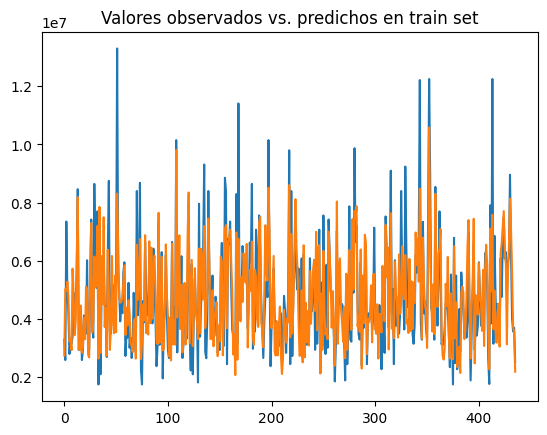

In [313]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

#### Predicciones es el subgrupo de datos de prueba

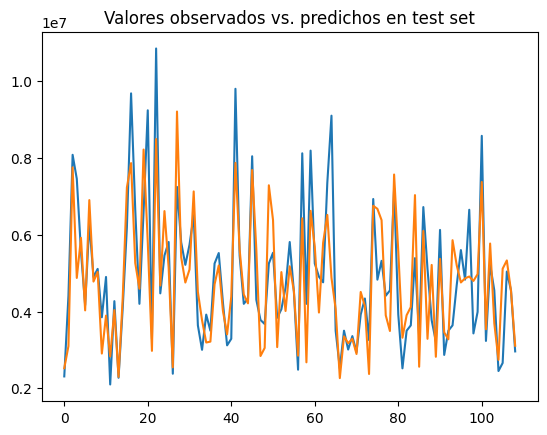

In [314]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

#### Algunas preguntas comunes:

En el script de la unidad 1 retiramos valores extremos y obtuvimos el logaritmo de la variable precio. ¿Requerimos realizar en sklearn algún tipo de estandarización de variables previo al entrenamiento del algoritmo?

En el enfoque econométrico es necesario este tipo de transformaciones a las variables y el cumplimiento de los supuestos, desde el enfoque de ML en donde la importancia radica en el nivel predictivo, esto no es necesario ya que el algoritmo iterativo: "gradient descent" si bien puede beneficiarse en tiempo de cálculo de la estandarización de variables, no es un limitante para obtener resultados.

## Bonus: Feature importance

Uno de los aspectos importantes al momento de entregar un modelo, es discernir las variabels conforme a su utilidad para predecir nuestra variable objetivo. Este tipo de análisis se llama "feature importance" y calcula la importancia de cada variable independiente en nuestro modelo. Para ello, ajustamos nuestro modelo de regresión lineal  y extraemos los coeficientes de los predictores, los cuales proporcionan la base para una puntuación de importancia de características.

Nota: Para este tipo de análisis requerimos que las variables de entrada tengan la misma escala o se hayan escalado antes.

Requerimos normalizar las variables explicativas porque en un análisis de feature importance si lo obviamos, el modelo difícilmente captará la contribución de las variables de menor escala, incluso si son fuertes. Para ello, usaremos la función StandardScaler del module de sklearn.

In [315]:
from sklearn.preprocessing import StandardScaler

In [316]:
sc = StandardScaler()

In [317]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Observan algo interesante en el código precedente?

### Entrenar el modelo con los datos de entrenamiento

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar al modelo:

In [318]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

### Realizar las predicciones

In [319]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

#### R^2

In [320]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.6879699864014102
El R^2 del subconjunto de prueba es: 0.6266250093828516


Aunque la escala de las variables no afecta directamente al R-cuadrado, puede influir en otros aspectos del análisis de regresión lineal. El R-cuadrado se calcula utilizando las sumas de cuadrados de los residuos (SSR) y las sumas de cuadrados totales (SST). La escala de las variables no afecta directamente a estos valores, ya que se trata de sumas de las diferencias al cuadrado.



#### Predicciones es el subgrupo de datos de entrenamiento

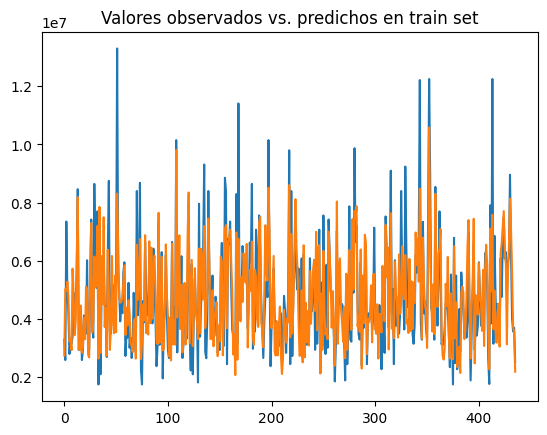

In [321]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

#### Predicciones es el subgrupo de datos de prueba

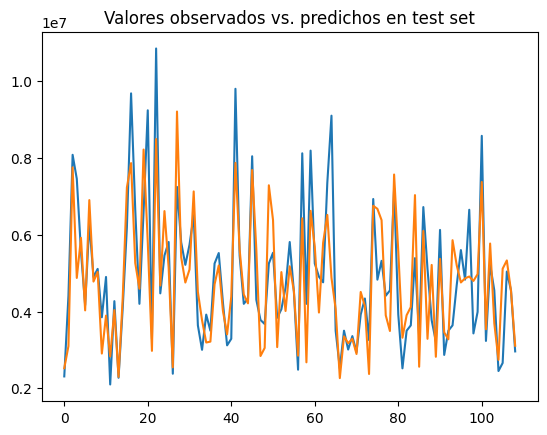

In [322]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

### Extraer los coeficientes

In [323]:
importancia = modelo_regresion_std.coef_

In [324]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: 450661.76639
Variable explicativa No. 1, Score: -159259.50424
Variable explicativa No. 2, Score: 556217.25939
Variable explicativa No. 3, Score: 485555.20667
Variable explicativa No. 4, Score: 134053.47925
Variable explicativa No. 5, Score: 118223.95415
Variable explicativa No. 6, Score: 126477.23854
Variable explicativa No. 7, Score: 64062.57994
Variable explicativa No. 8, Score: 229321.40526
Variable explicativa No. 9, Score: 331806.71807
Variable explicativa No. 10, Score: 366196.88388
Variable explicativa No. 11, Score: 145088.88542


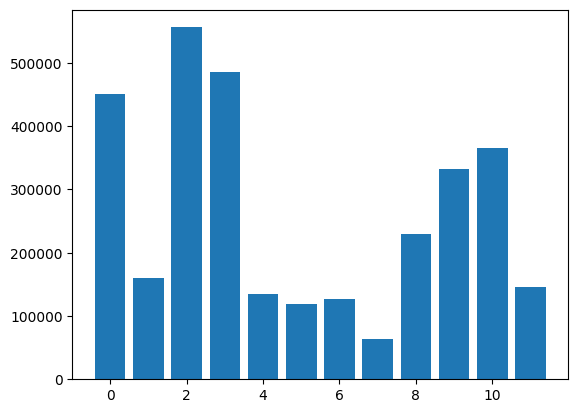

In [325]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], abs(importancia))
plt.show()

Recuerden que los coeficientes indican la relación lineal entre cada característica y la variable de respuesta, por lo que los coeficientes con valores absolutos más altos pueden considerarse como características más importantes en términos de su contribución relativa al modelo.

# Referencia:

**Cevallos, M.** (2022). *Regresion Lineal Múltiple Aplicada*. Universidad de las Américas. Recuperado de [Enlace](https://raw.githubusercontent.com/marcecevallos/UDLA_Analitica_predictiva/main/Regresi%C3%B3n%20m%C3%BAltiple%20aplicada)
